In [32]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer


In [ ]:

n = int(input("Enter the number of qubits"))
print('qubits ', n)
dj = QuantumCircuit(n+1, n)
func = input("Enter the function:" )
print('function ', func)
dj.x(n)
dj.barrier()
dj.h(range(n+1))
dj.barrier()
# bit_string : "xn-1 xn-2....x1 x0"
def oracle_function(qc : QuantumCircuit, f:str,n):
    if f == '0' or f == '1':
        qc.id(range(0, n))
    bar_pass = 1
    for i in range(n):

        if f.count(f'x{i+1} ') or f.count(f' x{i+1}'):
            if f.count('xor'):
                qc.cx(i, n)
                if f.count(f'bar') and bar_pass:
                    qc.x(i)
                    bar_pass = 0
                continue
            else:
                qc.cx(i, n)
                
                if f.count(f'bar'):
                    qc.x(i)
                return qc
    return qc    


oracle_function(dj, func, n)

dj.barrier()

dj.h(range(n))
dj.barrier()



dj.draw('mpl')    


In [ ]:
state = Statevector(dj)

state.draw('latex')

QiskitError: 'Cannot apply instruction with classical bits: measure'

the function is balanced


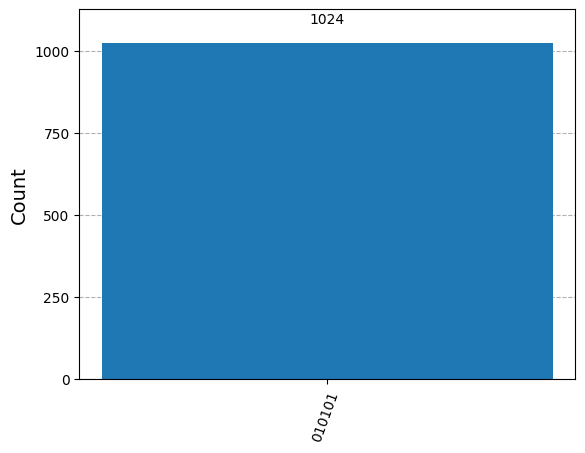

In [ ]:
sim = Aer.get_backend('aer_simulator')

dj.measure(range(n), range(n))
results = sim.run(dj).result()
counts = results.get_counts()
outcomes = list(counts.keys())[0]
if outcomes == '0'*n:

    print("the function is constant")
else:
    print("the function is balanced")

plot_histogram(counts)

In [27]:
from math import pi

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit

q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# Your code here
# qc.rx(2*pi/3, q[0])
# qc.r(4*pi/3, 0,  q[0])
qc.ry(4*pi/3, q[0])

state = Statevector(qc)
state.draw('latex')
# qc.measure(q,c)

<IPython.core.display.Latex object>

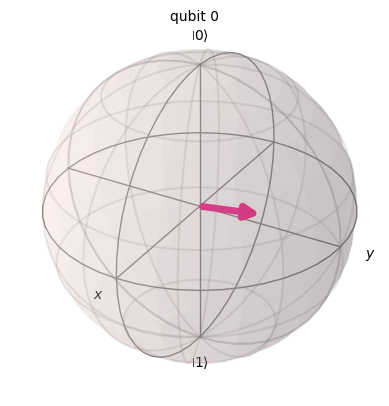

In [28]:
state.draw('bloch')

In [27]:
state.draw('latex')

<IPython.core.display.Latex object>

In [42]:
qc  = QuantumCircuit(2)

qc.h(0)
# qc.x(0)
# qc.cx(0, 1)
# qc.x(1)
state = Statevector(qc)
state.draw('latex')

<IPython.core.display.Latex object>

In [42]:
qc = QuantumCircuit(3)
qc.h(1)

state = Statevector(qc)
state.draw('latex')

<IPython.core.display.Latex object>

In [49]:
from qiskit import ClassicalRegister, QuantumRegister


q2 = QuantumRegister(2,"qreg")
c2 = ClassicalRegister(2,"creg")
qc2 = QuantumCircuit(q2,c2)
print(q2[0])
if(q2[0] == 0):
    print('bitych ot works')
else:
    print('that noe tfodsmf')

Qubit(QuantumRegister(2, 'qreg'), 0)
that noe tfodsmf


In [39]:
q2 = QuantumRegister(2,"qreg")
c2 = ClassicalRegister(2,"creg")
qc2 = QuantumCircuit(q2,c2)


qc2.h(q2[0])
qc2.cx(q2[0],q2[1])
# Your code here
qc2.x(q2[0])
qc2.measure(q2,c2)
aer = Aer.get_backend('aer_simulator')
# t_qc = transpile(qc, aer)
job = aer.run(qc2,shots=1000)
counts = job.result().get_counts(qc2)
print(counts)

{'10': 480, '01': 520}
